In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

precovid_ohio = "precovid_ohio2019.csv"
precovid_ohio_df = pd.read_csv(precovid_ohio)


In [3]:
precovid_ohio_df.dtypes

business_id        object
name               object
state_             object
city               object
stars             float64
review_count        int64
is_open             int64
categories         object
customer_stars      int64
date_              object
dtype: object

In [4]:
# Clean by only open restaurants

open_precovid_ohio_df = precovid_ohio_df.loc[(precovid_ohio_df['is_open'] == 1)]
open_precovid_ohio_df

,business_id,name,state_,city,stars,review_count,is_open,categories,customer_stars,date_
6,JqSL9fNnkwsxQkqGJyHJ2g,101 Beer Kitchen,OH,Westerville,4.5,318,1,"Gastropubs, Breakfast & Brunch, American (New)...",5,9/7/2019 16:39
7,JqSL9fNnkwsxQkqGJyHJ2g,101 Beer Kitchen,OH,Westerville,4.5,318,1,"Gastropubs, Breakfast & Brunch, American (New)...",4,11/18/2019 0:06
8,JqSL9fNnkwsxQkqGJyHJ2g,101 Beer Kitchen,OH,Westerville,4.5,318,1,"Gastropubs, Breakfast & Brunch, American (New)...",3,1/26/2019 5:07
9,JqSL9fNnkwsxQkqGJyHJ2g,101 Beer Kitchen,OH,Westerville,4.5,318,1,"Gastropubs, Breakfast & Brunch, American (New)...",5,9/25/2019 21:51
10,JqSL9fNnkwsxQkqGJyHJ2g,101 Beer Kitchen,OH,Westerville,4.5,318,1,"Gastropubs, Breakfast & Brunch, American (New)...",5,10/21/2019 14:42
...,...,...,...,...,...,...,...,...,...,...
5348,FyGavoQ1DdC3ZsjKAfxezA,Zoup!,OH,Columbus,4.0,30,1,"Soup, Salad, Sandwiches, Restaurants",4,3/7/2019 18:25
5349,FyGavoQ1DdC3ZsjKAfxezA,Zoup!,OH,Columbus,4.0,30,1,"Soup, Salad, Sandwiches, Restaurants",4,2/9/2019 21:57
5350,FyGavoQ1DdC3ZsjKAfxezA,Zoup!,OH,Columbus,4.0,30,1,"Soup, Salad, Sandwiches, Restaurants",4,2/2/2019 14:18
5351,IJVqt4PE0QKaqJ2VfBYBZg,Zoup!,OH,Columbus,3.0,19,1,"Sandwiches, Soup, Salad, Restaurants",5,4/16/2019 11:26


In [5]:
#Drop duplicate business names

open_precovid_ohio_df[["business_id","name"]].drop_duplicates()

,business_id,name
6,JqSL9fNnkwsxQkqGJyHJ2g,101 Beer Kitchen
73,n3sEf5PqRFHoJ_8TCynRPg,A Matter of Steak
74,6zMk-He0XhowQu2p5pdtBg,Abner's Casual Dining
79,IDlvMzb_9Prxzz2LK0Ww1Q,Adobe Gilas
89,uEwxmb6YZnqg7V3YIcyc4Q,African Paradise Restaurant
...,...,...
5319,J8BnOx3rJ9oO78KtF0K5OQ,Yoshi's Japanese Restaurant
5328,97q11wWWFqku1SOHZJx6gA,Zest Juice
5330,NWjoZB068Mg18lYTI3AS2A,Ziggy's
5336,FyGavoQ1DdC3ZsjKAfxezA,Zoup!


In [6]:
# Filtered by business_id and name 

open_precovid_ohio_df.groupby(by=["business_id","name"]).mean().to_csv("open_clean_data.csv")

In [7]:
# Dropped 7 values

clean_open_precovid_ohio_df = open_precovid_ohio_df.groupby(by=["business_id","name"]).mean().reset_index()
dropped_clean_open_precovid_ohio_df = clean_open_precovid_ohio_df[clean_open_precovid_ohio_df["business_id"]!="#NAME?"]
dropped_clean_open_precovid_ohio_df

,business_id,name,stars,review_count,is_open,customer_stars
6,0197L3CuCRuK28q6PAUyCw,Hollywood Casino Columbus,2.5,184.0,1.0,4.285714
7,02_FLyffoofP65iEqetwlQ,Noodles & Company,3.0,26.0,1.0,3.500000
8,0TQp6koYQHrZ3qRWgiOAkw,Panera Bread,2.5,12.0,1.0,4.666667
9,0hW9nMGAZVW6n1uuRycVbg,Teriyaki Express,2.5,6.0,1.0,3.000000
10,0oZBfNCxn2jn-6flKr5nEw,Columbus Museum of Art,4.0,125.0,1.0,4.454545
...,...,...,...,...,...,...
422,zejcxgXeGc0txcSn122sHA,El Vaquero Mexican Restaurant,3.0,123.0,1.0,4.363636
423,zfEuNOQCRUmBoduSmSRneg,Typhoon Asian Fusion Bistro,4.0,142.0,1.0,4.400000
424,zlMZ_nTXFEsRTVgtpjSkvQ,Chipotle Mexican Grill,2.0,181.0,1.0,4.000000
425,zliwgd91NSKqEpLD0tQQEA,Jubilee Market and Cafe,4.0,5.0,1.0,5.000000


In [8]:
postcovid_ohio = "postcovid_ohio2020.csv"
postcovid_ohio_df = pd.read_csv(postcovid_ohio)


In [9]:
open_postcovid_ohio_df = postcovid_ohio_df.loc[(postcovid_ohio_df['is_open'] == 1)]


In [10]:
open_postcovid_ohio_df.groupby(by=["business_id","name"]).mean().to_csv

<bound method NDFrame.to_csv of                                                        stars  review_count  \
business_id            name                                                  
#NAME?                 Bob Evans                         3.0          36.0   
                       Cafe Elena                        4.5          36.0   
                       Cake Walk Bakery & Indian Cafe    4.0          59.0   
                       Chuchay's Supermarket             4.5          12.0   
                       City Barbeque                     3.0           8.0   
...                                                      ...           ...   
zkZxHf9Y3RNe9AnRNEWp-g Skyline Chili                     4.0          40.0   
zlMZ_nTXFEsRTVgtpjSkvQ Chipotle Mexican Grill            2.0         181.0   
zoTFMr5y5JYLnyl2IuZXrw Sunny Street Cafe                 3.5          92.0   
zwKIQgthba1FUPWS7nOo0w Smokey Bones Bar & Fire Grill     3.0         129.0   
zxlOpCfC8xN1QCGk4u_CLQ Nazca Per

In [11]:
# Dropped restaurants w/o name data

clean_open_postcovid_ohio_df = open_postcovid_ohio_df.groupby(by=["business_id","name"]).mean().reset_index()
dropped_clean_open_postcovid_ohio_df = clean_open_postcovid_ohio_df[clean_open_postcovid_ohio_df["business_id"]!="#NAME?"]
dropped_clean_open_postcovid_ohio_df

,business_id,name,stars,review_count,is_open,customer_stars
28,-1rvXk4zbX3I6ddMCtPlmQ,ZenCha Tea Cafe,4.0,97.0,1.0,4.80
29,-2NDj-2t-4eCAb5AFXBgGA,Happy Wok,3.5,28.0,1.0,4.00
30,-9Xrvq_h_wuY7NLUCmMeRQ,Aladdin's Eatery - Grandview,4.0,149.0,1.0,4.25
31,-RpXYkc-4WDM4iJhgc4e2A,Belmont Deli,4.5,14.0,1.0,5.00
32,0197L3CuCRuK28q6PAUyCw,Hollywood Casino Columbus,2.5,184.0,1.0,4.00
...,...,...,...,...,...,...
2392,zkZxHf9Y3RNe9AnRNEWp-g,Skyline Chili,4.0,40.0,1.0,5.00
2393,zlMZ_nTXFEsRTVgtpjSkvQ,Chipotle Mexican Grill,2.0,181.0,1.0,3.00
2394,zoTFMr5y5JYLnyl2IuZXrw,Sunny Street Cafe,3.5,92.0,1.0,5.00
2395,zwKIQgthba1FUPWS7nOo0w,Smokey Bones Bar & Fire Grill,3.0,129.0,1.0,3.60


In [12]:
# Merged clean pre and post Ohio data

merged_pre_post_ohio = pd.merge(dropped_clean_open_postcovid_ohio_df,dropped_clean_open_precovid_ohio_df, on="business_id", how="outer").fillna(0)

In [13]:
merged_pre_post_ohio

,business_id,name_x,stars_x,review_count_x,is_open_x,customer_stars_x,name_y,stars_y,review_count_y,is_open_y,customer_stars_y
0,-1rvXk4zbX3I6ddMCtPlmQ,ZenCha Tea Cafe,4.0,97.0,1.0,4.80,0,0.0,0.0,0.0,0.000000
1,-2NDj-2t-4eCAb5AFXBgGA,Happy Wok,3.5,28.0,1.0,4.00,0,0.0,0.0,0.0,0.000000
2,-9Xrvq_h_wuY7NLUCmMeRQ,Aladdin's Eatery - Grandview,4.0,149.0,1.0,4.25,0,0.0,0.0,0.0,0.000000
3,-RpXYkc-4WDM4iJhgc4e2A,Belmont Deli,4.5,14.0,1.0,5.00,0,0.0,0.0,0.0,0.000000
4,0197L3CuCRuK28q6PAUyCw,Hollywood Casino Columbus,2.5,184.0,1.0,4.00,Hollywood Casino Columbus,2.5,184.0,1.0,4.285714
...,...,...,...,...,...,...,...,...,...,...,...
2431,xFX9f5NYIZKHp9iX-_7Rxg,0,0.0,0.0,0.0,0.00,Dunkin',2.0,30.0,1.0,5.000000
2432,xpAjyXJjv-T7trJiVuQmRQ,0,0.0,0.0,0.0,0.00,Arbys,2.0,9.0,1.0,3.000000
2433,zBi_JWB5uUdVuz3JLoAxGQ,0,0.0,0.0,0.0,0.00,Vanity Gentlemen's Club,3.0,14.0,1.0,4.000000
2434,zULSMYWqX_qDpmqPxcqZPA,0,0.0,0.0,0.0,0.00,Awash,4.5,6.0,1.0,5.000000


In [14]:
# Merged data only for open restuarants 

clean_merged_pre_post_ohio = merged_pre_post_ohio [(merged_pre_post_ohio["is_open_x"] == 1) & (merged_pre_post_ohio["is_open_y"] == 1)]

In [15]:
clean_merged_pre_post_ohio

,business_id,name_x,stars_x,review_count_x,is_open_x,customer_stars_x,name_y,stars_y,review_count_y,is_open_y,customer_stars_y
4,0197L3CuCRuK28q6PAUyCw,Hollywood Casino Columbus,2.5,184.0,1.0,4.000000,Hollywood Casino Columbus,2.5,184.0,1.0,4.285714
7,02_FLyffoofP65iEqetwlQ,Noodles & Company,3.0,26.0,1.0,4.500000,Noodles & Company,3.0,26.0,1.0,3.500000
22,0TQp6koYQHrZ3qRWgiOAkw,Panera Bread,2.5,12.0,1.0,4.333333,Panera Bread,2.5,12.0,1.0,4.666667
31,0hW9nMGAZVW6n1uuRycVbg,Teriyaki Express,2.5,6.0,1.0,4.000000,Teriyaki Express,2.5,6.0,1.0,3.000000
36,0oZBfNCxn2jn-6flKr5nEw,Columbus Museum of Art,4.0,125.0,1.0,5.000000,Columbus Museum of Art,4.0,125.0,1.0,4.454545
...,...,...,...,...,...,...,...,...,...,...,...
2360,zdXd2X8oH4r7QCD0mF9tig,Be Fit Cafe,3.5,90.0,1.0,4.250000,Be Fit Cafe,3.5,90.0,1.0,4.285714
2361,zejcxgXeGc0txcSn122sHA,El Vaquero Mexican Restaurant,3.0,123.0,1.0,4.500000,El Vaquero Mexican Restaurant,3.0,123.0,1.0,4.363636
2362,zfEuNOQCRUmBoduSmSRneg,Typhoon Asian Fusion Bistro,4.0,142.0,1.0,4.285714,Typhoon Asian Fusion Bistro,4.0,142.0,1.0,4.400000
2365,zlMZ_nTXFEsRTVgtpjSkvQ,Chipotle Mexican Grill,2.0,181.0,1.0,3.000000,Chipotle Mexican Grill,2.0,181.0,1.0,4.000000


In [16]:
top_clean_merged_pre_post_ohio = clean_merged_pre_post_ohio.head(20)

In [17]:
top_clean_merged_pre_post_ohio

,business_id,name_x,stars_x,review_count_x,is_open_x,customer_stars_x,name_y,stars_y,review_count_y,is_open_y,customer_stars_y
4,0197L3CuCRuK28q6PAUyCw,Hollywood Casino Columbus,2.5,184.0,1.0,4.000000,Hollywood Casino Columbus,2.5,184.0,1.0,4.285714
7,02_FLyffoofP65iEqetwlQ,Noodles & Company,3.0,26.0,1.0,4.500000,Noodles & Company,3.0,26.0,1.0,3.500000
22,0TQp6koYQHrZ3qRWgiOAkw,Panera Bread,2.5,12.0,1.0,4.333333,Panera Bread,2.5,12.0,1.0,4.666667
31,0hW9nMGAZVW6n1uuRycVbg,Teriyaki Express,2.5,6.0,1.0,4.000000,Teriyaki Express,2.5,6.0,1.0,3.000000
36,0oZBfNCxn2jn-6flKr5nEw,Columbus Museum of Art,4.0,125.0,1.0,5.000000,Columbus Museum of Art,4.0,125.0,1.0,4.454545
37,0q8zaMYcoxFC8-hlYBJCmg,Crazy Burrito,3.5,113.0,1.0,4.375000,Crazy Burrito,3.5,113.0,1.0,4.307692
44,0zMMf_7Ftv1b2RppTn_EOQ,JP's Barbeque Ribs and Chicken,3.0,33.0,1.0,3.666667,JP's Barbeque Ribs and Chicken,3.0,33.0,1.0,5.000000
48,11fCl3glIwye--mXs3VxWA,Wendy's,4.0,19.0,1.0,4.000000,Wendy's,4.0,19.0,1.0,5.000000
60,1MekeAY8HzPhVWNyh50LQQ,Good Fella'z Pizzeria,4.5,20.0,1.0,5.000000,Good Fella'z Pizzeria,4.5,20.0,1.0,4.000000
61,1Oq1mM5hqjehqejkfq5orA,Howdy's Deli,4.0,18.0,1.0,4.000000,Howdy's Deli,4.0,18.0,1.0,5.000000


In [18]:
%matplotlib notebook

<IPython.core.display.Javascript object>


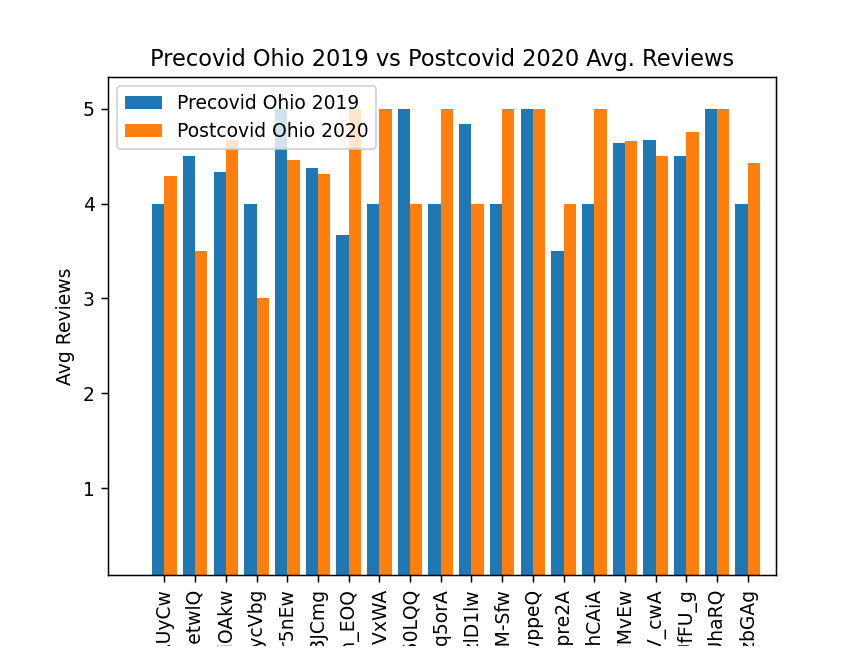

In [19]:
X_ohio = top_clean_merged_pre_post_ohio["business_id"]
Yprereviews_ohio = top_clean_merged_pre_post_ohio["customer_stars_x"]
Zpostreviews_ohio = top_clean_merged_pre_post_ohio["customer_stars_y"]
X_axis_ohio = np.arange(len(X_ohio))
     
plt.bar(X_axis_ohio - 0.2, Yprereviews_ohio, 0.4, label = 'Precovid Ohio 2019')
plt.bar(X_axis_ohio + 0.2, Zpostreviews_ohio, 0.4, label = 'Postcovid Ohio 2020')
plt.xticks(X_axis_ohio, X_ohio)
plt.xlabel("Business ID")
plt.ylabel("Avg Reviews")
plt.title("Precovid Ohio 2019 vs Postcovid 2020 Avg. Reviews")
plt.legend()
plt.xticks(rotation=90)
plt.show()


In [24]:
plt.savefig('Project-1-data-analysis.pdf')

In [27]:
top_clean_merged_pre_post_ohio

,business_id,name_x,stars_x,review_count_x,is_open_x,customer_stars_x,name_y,stars_y,review_count_y,is_open_y,customer_stars_y
4,0197L3CuCRuK28q6PAUyCw,Hollywood Casino Columbus,2.5,184.0,1.0,4.000000,Hollywood Casino Columbus,2.5,184.0,1.0,4.285714
7,02_FLyffoofP65iEqetwlQ,Noodles & Company,3.0,26.0,1.0,4.500000,Noodles & Company,3.0,26.0,1.0,3.500000
22,0TQp6koYQHrZ3qRWgiOAkw,Panera Bread,2.5,12.0,1.0,4.333333,Panera Bread,2.5,12.0,1.0,4.666667
31,0hW9nMGAZVW6n1uuRycVbg,Teriyaki Express,2.5,6.0,1.0,4.000000,Teriyaki Express,2.5,6.0,1.0,3.000000
36,0oZBfNCxn2jn-6flKr5nEw,Columbus Museum of Art,4.0,125.0,1.0,5.000000,Columbus Museum of Art,4.0,125.0,1.0,4.454545
37,0q8zaMYcoxFC8-hlYBJCmg,Crazy Burrito,3.5,113.0,1.0,4.375000,Crazy Burrito,3.5,113.0,1.0,4.307692
44,0zMMf_7Ftv1b2RppTn_EOQ,JP's Barbeque Ribs and Chicken,3.0,33.0,1.0,3.666667,JP's Barbeque Ribs and Chicken,3.0,33.0,1.0,5.000000
48,11fCl3glIwye--mXs3VxWA,Wendy's,4.0,19.0,1.0,4.000000,Wendy's,4.0,19.0,1.0,5.000000
60,1MekeAY8HzPhVWNyh50LQQ,Good Fella'z Pizzeria,4.5,20.0,1.0,5.000000,Good Fella'z Pizzeria,4.5,20.0,1.0,4.000000
61,1Oq1mM5hqjehqejkfq5orA,Howdy's Deli,4.0,18.0,1.0,4.000000,Howdy's Deli,4.0,18.0,1.0,5.000000


In [58]:
dropped_clean_open_postcovid_ohio_df["customer_stars"].mean() 

4.462609279807138

In [59]:
dropped_clean_open_precovid_ohio_df["customer_stars"].mean() 

4.373857290718968

In [28]:
precovid_texas = "precovid_texas2019.csv"
precovid_texas_df = pd.read_csv(precovid_texas)


In [29]:
open_precovid_texas_df = precovid_texas_df.loc[(precovid_texas_df['is_open'] == 1)]
open_precovid_texas_df

,business_id,name,state_,city,stars,review_count,is_open,categories,customer_stars,date_
0,FwO183blfDg8g6sFv-NTsQ,15th Street Cafe,TX,Austin,3.5,9,1,"Restaurants, Hotels & Travel, Event Planning &...",4,7/23/2019 18:54
1,Rba9Ol4jnTiov6_iAuoF5g,1618 Asian Fusion,TX,Austin,5.0,641,1,"Food, Breakfast & Brunch, Thai, Restaurants, D...",5,12/23/2019 0:53
2,Rba9Ol4jnTiov6_iAuoF5g,1618 Asian Fusion,TX,Austin,5.0,641,1,"Food, Breakfast & Brunch, Thai, Restaurants, D...",5,10/27/2019 15:03
3,Rba9Ol4jnTiov6_iAuoF5g,1618 Asian Fusion,TX,Austin,5.0,641,1,"Food, Breakfast & Brunch, Thai, Restaurants, D...",5,10/13/2019 20:54
4,Rba9Ol4jnTiov6_iAuoF5g,1618 Asian Fusion,TX,Austin,5.0,641,1,"Food, Breakfast & Brunch, Thai, Restaurants, D...",5,12/8/2019 4:48
...,...,...,...,...,...,...,...,...,...,...
17079,sXgzgNe7YJO1A_86EKUyCw,ZZA Pizza +Â Salad,TX,Bee Cave,4.5,63,1,"Gluten-Free, Pizza, Restaurants, Salad",5,12/30/2019 0:59
17080,sXgzgNe7YJO1A_86EKUyCw,ZZA Pizza +Â Salad,TX,Bee Cave,4.5,63,1,"Gluten-Free, Pizza, Restaurants, Salad",5,12/18/2019 23:19
17081,sXgzgNe7YJO1A_86EKUyCw,ZZA Pizza +Â Salad,TX,Bee Cave,4.5,63,1,"Gluten-Free, Pizza, Restaurants, Salad",5,12/30/2019 23:53
17082,sXgzgNe7YJO1A_86EKUyCw,ZZA Pizza +Â Salad,TX,Bee Cave,4.5,63,1,"Gluten-Free, Pizza, Restaurants, Salad",5,12/28/2019 20:31


In [30]:
open_precovid_texas_df.groupby(by=["business_id","name"]).mean().to_csv

<bound method NDFrame.to_csv of                                                     stars  review_count  \
business_id            name                                               
#NAME?                 Chilis                         3.0          31.0   
                       Gabriela's Downtown            4.0         490.0   
                       Lenoir                         4.0         462.0   
                       Spread & Co                    4.5          61.0   
                       Terry's Seafood and Chicken    3.5          82.0   
...                                                   ...           ...   
yTa3QHFVTxxVoyCFQw3fsg Casa Arandinas                 3.5         152.0   
yZI1jT93O8jrNbg6PWReeQ Taco Cabana                    2.0         122.0   
y_akPkEPXhWopxNJMoO7tQ Schlotzsky's                   3.0          34.0   
yd6dmLkbX1Ycmy3VcDVzng Cuba 512                       4.0         490.0   
zVxEatiP30iD5RzlXldm9g The Dogwood                    3.0         18

In [31]:
clean_open_precovid_texas_df = open_precovid_texas_df.groupby(by=["business_id","name"]).mean().reset_index()
dropped_clean_open_precovid_texas_df = clean_open_precovid_texas_df[clean_open_precovid_texas_df["business_id"]!="#NAME?"]
dropped_clean_open_precovid_texas_df

,business_id,name,stars,review_count,is_open,customer_stars
6,-4ofMtrD7pSpZIX5pnDkig,Mozart's Coffee Roasters,4.0,1445.0,1.0,4.471014
7,-85pDrVcAdzNK55bFpintg,Shoal Creek Saloon,3.5,370.0,1.0,4.391304
8,04hJKTsk-Bte5tf6Z-tl0Q,Tacos Ricos,4.5,14.0,1.0,5.000000
9,08wLD2pUdZV73zHywMpREA,Musashino Sushi Dokoro,4.0,678.0,1.0,4.593220
10,0Fd0QMivl6S8mMnmnYovRg,Epicure Market,4.5,157.0,1.0,4.852941
...,...,...,...,...,...,...
423,yTa3QHFVTxxVoyCFQw3fsg,Casa Arandinas,3.5,152.0,1.0,4.888889
424,yZI1jT93O8jrNbg6PWReeQ,Taco Cabana,2.0,122.0,1.0,4.333333
425,y_akPkEPXhWopxNJMoO7tQ,Schlotzsky's,3.0,34.0,1.0,4.000000
426,yd6dmLkbX1Ycmy3VcDVzng,Cuba 512,4.0,490.0,1.0,4.490566


In [32]:
sorted_dropped_clean_open_precovid_texas_df = dropped_clean_open_precovid_texas_df.head(10)

In [33]:
sorted_dropped_clean_open_precovid_texas_df

,business_id,name,stars,review_count,is_open,customer_stars
6,-4ofMtrD7pSpZIX5pnDkig,Mozart's Coffee Roasters,4.0,1445.0,1.0,4.471014
7,-85pDrVcAdzNK55bFpintg,Shoal Creek Saloon,3.5,370.0,1.0,4.391304
8,04hJKTsk-Bte5tf6Z-tl0Q,Tacos Ricos,4.5,14.0,1.0,5.000000
9,08wLD2pUdZV73zHywMpREA,Musashino Sushi Dokoro,4.0,678.0,1.0,4.593220
10,0Fd0QMivl6S8mMnmnYovRg,Epicure Market,4.5,157.0,1.0,4.852941
11,0YVLI3LjxuXYgofIjiYmdw,Cannon Coffee,4.5,28.0,1.0,4.600000
12,0lpHYqjWvNZ1Z66Re3KNoQ,Contigo,4.0,820.0,1.0,4.265306
13,0m9yum2bqMCQtxbHuQbQFw,DEE DEE,4.5,385.0,1.0,4.836364
14,1-0Jhx0QpzPk9cGcMYRUDA,Halal Bros,4.0,620.0,1.0,4.489362
15,1-lgvJoVYrbywrf6kMYsvg,Beijing Bistro,3.5,93.0,1.0,4.533333


In [34]:
postcovid_texas = "postcovid_texas2020.csv"
postcovid_texas_df = pd.read_csv(postcovid_texas,encoding='latin-1')


In [35]:
open_postcovid_texas_df = postcovid_texas_df.loc[(postcovid_texas_df['is_open'] == 1)]
open_postcovid_texas_df

,business_id,name,state_,city,stars,review_count,is_open,categories,customer_stars,date_
0,6uSPLo9R0vxtJxPIhsMSMg,101 By Teahaus,TX,Austin,4.0,256,1,"Bubble Tea, Restaurants, Coffee & Tea, Asian F...",3,7/16/2020 4:36
1,6uSPLo9R0vxtJxPIhsMSMg,101 By Teahaus,TX,Austin,4.0,256,1,"Bubble Tea, Restaurants, Coffee & Tea, Asian F...",3,1/23/2020 16:50
2,6uSPLo9R0vxtJxPIhsMSMg,101 By Teahaus,TX,Austin,4.0,256,1,"Bubble Tea, Restaurants, Coffee & Tea, Asian F...",5,5/12/2020 23:50
3,6uSPLo9R0vxtJxPIhsMSMg,101 By Teahaus,TX,Austin,4.0,256,1,"Bubble Tea, Restaurants, Coffee & Tea, Asian F...",5,5/7/2020 21:34
4,6uSPLo9R0vxtJxPIhsMSMg,101 By Teahaus,TX,Austin,4.0,256,1,"Bubble Tea, Restaurants, Coffee & Tea, Asian F...",5,8/5/2020 21:21
...,...,...,...,...,...,...,...,...,...,...
46575,sXgzgNe7YJO1A_86EKUyCw,ZZA Pizza +?ÿSalad,TX,Bee Cave,4.5,63,1,"Gluten-Free, Pizza, Restaurants, Salad",3,8/21/2020 22:58
46576,sXgzgNe7YJO1A_86EKUyCw,ZZA Pizza +?ÿSalad,TX,Bee Cave,4.5,63,1,"Gluten-Free, Pizza, Restaurants, Salad",5,5/4/2020 23:38
46577,sXgzgNe7YJO1A_86EKUyCw,ZZA Pizza +?ÿSalad,TX,Bee Cave,4.5,63,1,"Gluten-Free, Pizza, Restaurants, Salad",5,7/4/2020 21:37
46578,sXgzgNe7YJO1A_86EKUyCw,ZZA Pizza +?ÿSalad,TX,Bee Cave,4.5,63,1,"Gluten-Free, Pizza, Restaurants, Salad",5,1/31/2020 20:38


In [36]:
open_postcovid_texas_df.groupby(by=["business_id","name"]).mean().to_csv

<bound method NDFrame.to_csv of                                                                  stars  \
business_id            name                                              
#NAME?                 24 Diner                                    3.0   
                       All Star Burger                             4.0   
                       Austin Eastciders - Barton Springs          4.0   
                       Bamboo Bistro West Gate                     3.5   
                       Bennu Coffee                                4.0   
...                                                                ...   
zwPk8FMM1woI1MTGlkh-eg Try Hard Coffee Roasters                    5.0   
zxHD1kKGfwkFWFDflulFfA Lahleenea                                   5.0   
zxv1NaN6yOqNdZmECGaxNQ Tha Dog                                     4.5   
zyHMtStYlKG67WRprp6GZQ Cheddar's Scratch Kitchen                   3.5   
zzWxfdbWOnPzP5CxiZ0TvQ Original New Orleans Po-Boy & Gumbo Shop    3.0   

     

In [37]:
clean_open_postcovid_texas_df = open_postcovid_texas_df.groupby(by=["business_id","name"]).mean().reset_index()
dropped_clean_open_postcovid_texas_df = clean_open_postcovid_texas_df[clean_open_postcovid_texas_df["business_id"]!="#NAME?"]
dropped_clean_open_postcovid_texas_df

,business_id,name,stars,review_count,is_open,customer_stars
40,-0P5rq9DlJgXnfB320Fx9w,Greenade,4.5,13.0,1.0,4.333333
41,-1ShItlulHnBsoOQWnblzw,Super Burrito at the Water Tank,4.0,105.0,1.0,4.750000
42,-1XOUWwxeSAVdtuXuP9twg,Plow Burger,4.0,41.0,1.0,4.500000
43,-1Yu2HpGNvxWJHCe4pr70w,Freddy's Frozen Custard & Steakburgers,3.0,23.0,1.0,4.500000
44,-4cQ12xutjNLW-tPI06_tg,Donut Taco Palace II,3.5,83.0,1.0,4.666667
...,...,...,...,...,...,...
2715,zwPk8FMM1woI1MTGlkh-eg,Try Hard Coffee Roasters,5.0,30.0,1.0,5.000000
2716,zxHD1kKGfwkFWFDflulFfA,Lahleenea,5.0,13.0,1.0,5.000000
2717,zxv1NaN6yOqNdZmECGaxNQ,Tha Dog,4.5,8.0,1.0,5.000000
2718,zyHMtStYlKG67WRprp6GZQ,Cheddar's Scratch Kitchen,3.5,260.0,1.0,4.300000


In [38]:
%matplotlib notebook

In [39]:
dropped_clean_open_precovid_texas_df
dropped_clean_open_postcovid_texas_df

,business_id,name,stars,review_count,is_open,customer_stars
40,-0P5rq9DlJgXnfB320Fx9w,Greenade,4.5,13.0,1.0,4.333333
41,-1ShItlulHnBsoOQWnblzw,Super Burrito at the Water Tank,4.0,105.0,1.0,4.750000
42,-1XOUWwxeSAVdtuXuP9twg,Plow Burger,4.0,41.0,1.0,4.500000
43,-1Yu2HpGNvxWJHCe4pr70w,Freddy's Frozen Custard & Steakburgers,3.0,23.0,1.0,4.500000
44,-4cQ12xutjNLW-tPI06_tg,Donut Taco Palace II,3.5,83.0,1.0,4.666667
...,...,...,...,...,...,...
2715,zwPk8FMM1woI1MTGlkh-eg,Try Hard Coffee Roasters,5.0,30.0,1.0,5.000000
2716,zxHD1kKGfwkFWFDflulFfA,Lahleenea,5.0,13.0,1.0,5.000000
2717,zxv1NaN6yOqNdZmECGaxNQ,Tha Dog,4.5,8.0,1.0,5.000000
2718,zyHMtStYlKG67WRprp6GZQ,Cheddar's Scratch Kitchen,3.5,260.0,1.0,4.300000


In [40]:
merged_pre_post_texas = pd.merge(dropped_clean_open_precovid_texas_df,dropped_clean_open_postcovid_texas_df, on="business_id", how="outer").fillna(0)

In [41]:
merged_pre_post_texas.dtypes

business_id          object
name_x               object
stars_x             float64
review_count_x      float64
is_open_x           float64
customer_stars_x    float64
name_y               object
stars_y             float64
review_count_y      float64
is_open_y           float64
customer_stars_y    float64
dtype: object

In [42]:
merged_pre_post_texas

,business_id,name_x,stars_x,review_count_x,is_open_x,customer_stars_x,name_y,stars_y,review_count_y,is_open_y,customer_stars_y
0,-4ofMtrD7pSpZIX5pnDkig,Mozart's Coffee Roasters,4.0,1445.0,1.0,4.471014,Mozart's Coffee Roasters,4.0,1445.0,1.0,4.595745
1,-85pDrVcAdzNK55bFpintg,Shoal Creek Saloon,3.5,370.0,1.0,4.391304,Shoal Creek Saloon,3.5,370.0,1.0,4.238095
2,04hJKTsk-Bte5tf6Z-tl0Q,Tacos Ricos,4.5,14.0,1.0,5.000000,Tacos Ricos,4.5,14.0,1.0,4.583333
3,08wLD2pUdZV73zHywMpREA,Musashino Sushi Dokoro,4.0,678.0,1.0,4.593220,Musashino Sushi Dokoro,4.0,678.0,1.0,4.714286
4,0Fd0QMivl6S8mMnmnYovRg,Epicure Market,4.5,157.0,1.0,4.852941,Epicure Market,4.5,157.0,1.0,5.000000
...,...,...,...,...,...,...,...,...,...,...,...
2714,zwPk8FMM1woI1MTGlkh-eg,0,0.0,0.0,0.0,0.000000,Try Hard Coffee Roasters,5.0,30.0,1.0,5.000000
2715,zxHD1kKGfwkFWFDflulFfA,0,0.0,0.0,0.0,0.000000,Lahleenea,5.0,13.0,1.0,5.000000
2716,zxv1NaN6yOqNdZmECGaxNQ,0,0.0,0.0,0.0,0.000000,Tha Dog,4.5,8.0,1.0,5.000000
2717,zyHMtStYlKG67WRprp6GZQ,0,0.0,0.0,0.0,0.000000,Cheddar's Scratch Kitchen,3.5,260.0,1.0,4.300000


In [43]:
clean_merged_pre_post_texas = merged_pre_post_texas [(merged_pre_post_texas["is_open_x"] == 1) & (merged_pre_post_texas["is_open_y"] == 1)]

In [44]:
top_clean_merged_pre_post_texas = clean_merged_pre_post_texas.head(20)

In [45]:
top_clean_merged_pre_post_texas

,business_id,name_x,stars_x,review_count_x,is_open_x,customer_stars_x,name_y,stars_y,review_count_y,is_open_y,customer_stars_y
0,-4ofMtrD7pSpZIX5pnDkig,Mozart's Coffee Roasters,4.0,1445.0,1.0,4.471014,Mozart's Coffee Roasters,4.0,1445.0,1.0,4.595745
1,-85pDrVcAdzNK55bFpintg,Shoal Creek Saloon,3.5,370.0,1.0,4.391304,Shoal Creek Saloon,3.5,370.0,1.0,4.238095
2,04hJKTsk-Bte5tf6Z-tl0Q,Tacos Ricos,4.5,14.0,1.0,5.000000,Tacos Ricos,4.5,14.0,1.0,4.583333
3,08wLD2pUdZV73zHywMpREA,Musashino Sushi Dokoro,4.0,678.0,1.0,4.593220,Musashino Sushi Dokoro,4.0,678.0,1.0,4.714286
4,0Fd0QMivl6S8mMnmnYovRg,Epicure Market,4.5,157.0,1.0,4.852941,Epicure Market,4.5,157.0,1.0,5.000000
5,0YVLI3LjxuXYgofIjiYmdw,Cannon Coffee,4.5,28.0,1.0,4.600000,Cannon Coffee,4.5,28.0,1.0,4.750000
6,0lpHYqjWvNZ1Z66Re3KNoQ,Contigo,4.0,820.0,1.0,4.265306,Contigo,4.0,820.0,1.0,4.392857
7,0m9yum2bqMCQtxbHuQbQFw,DEE DEE,4.5,385.0,1.0,4.836364,DEE DEE,4.5,385.0,1.0,4.583333
8,1-0Jhx0QpzPk9cGcMYRUDA,Halal Bros,4.0,620.0,1.0,4.489362,Halal Bros,4.0,620.0,1.0,4.485714
9,1-lgvJoVYrbywrf6kMYsvg,Beijing Bistro,3.5,93.0,1.0,4.533333,Beijing Bistro,3.5,93.0,1.0,4.555556


In [48]:
X_texas = top_clean_merged_pre_post_texas["business_id"]
Yprereviews_texas = top_clean_merged_pre_post_texas["customer_stars_x"]
Zpostreviews_texas = top_clean_merged_pre_post_texas["customer_stars_y"]
X_axis_texas = np.arange(len(X_texas))
     
plt.bar(X_axis_texas - 0.2, Yprereviews_texas, 0.4, label = 'Precovid Texas 2019')
plt.bar(X_axis_texas + 0.2, Zpostreviews_texas, 0.4, label = 'Postcovid Texas 2020')
plt.xticks(X_axis_texas, X_texas)
plt.xlabel("Business ID")
plt.ylabel("Avg Reviews")
plt.title("Precovid Texas 2019 vs Postcovid 2020 Avg. Reviews")
plt.legend()
plt.xticks(rotation=90)
plt.show()


<IPython.core.display.Javascript object>


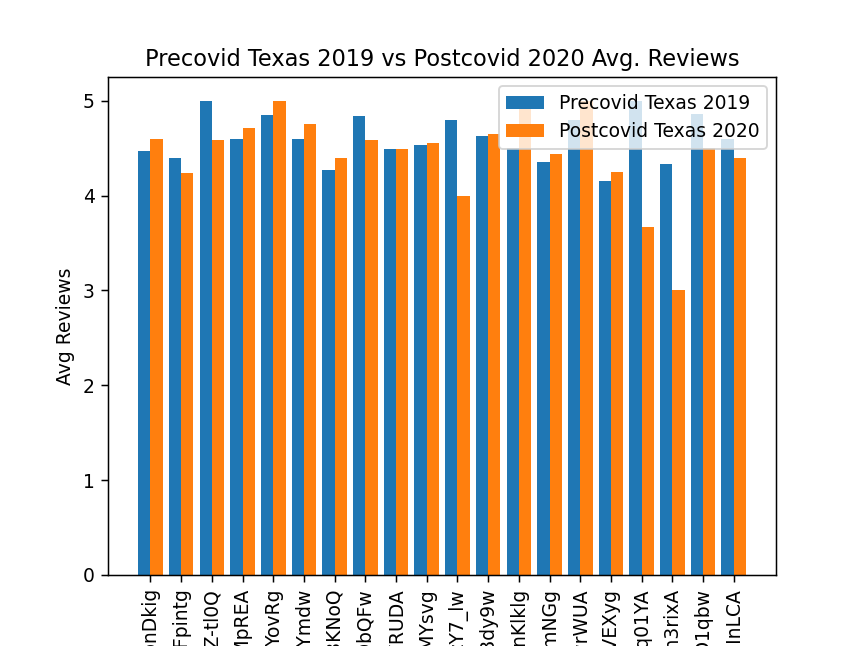

In [49]:
plt.savefig('Project-1-data-analysis.pdf')

In [55]:
dropped_clean_open_precovid_texas_df["customer_stars"].mean() 

4.536039949130098

In [78]:
dropped_clean_open_postcovid_texas_df["customer_stars"].mean()

4.563790725210208